In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import chardet
with open('data\space_mission', 'rb') as f:
    result = chardet.detect(f.read())
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
space_mission = pd.read_csv('data\space_mission', encoding= 'ascii')
space_mission

,Mission,Spacecraft,Mission Type,Outcome,Country,launch vehicle,Launch year
0,Pioneer 0 (Able I),Pioneer,Orbiter,Failure,USA,Thor,1958
1,Luna E-1 No.1,Luna,Impactor,Failure,Russia,Luna,1958
2,Pioneer 1 (Able II),Pioneer,Orbiter,Failure,USA,Thor,1958
3,Luna E-1 No.2,Luna,Impactor,Failure,Russia,Luna,1958
4,Pioneer 2 (Able III),Pioneer,Orbiter,Failure,USA,Thor,1958
...,...,...,...,...,...,...,...
151,SORA-Q,SORA-Q,Rover,Failure,Japan,Falcon,2022
152,Emirates Lunar Mission,Rashid,Rover,Failure,UAE,Falcon,2022
153,Lunar Flashlight,Lunar,Flyby,Failure,USA,Falcon,2022
154,Chandrayaan-3,Chandrayaan-3,Orbiter,Successful,India,LVM3,2023


In [4]:
space_mission.isna().sum()

Mission           0
Spacecraft        0
Mission Type      0
Outcome           0
Country           0
launch vehicle    0
Launch year       0
dtype: int64

In [5]:
space_mission['Outcome'].unique()

array(['Failure', 'Successful'], dtype=object)

In [6]:
# Label Encoding by using map function
space_mission['Outcome'] = space_mission['Outcome'].map({'Failure': 0, 'Successful': 1})

In [7]:
# One hot encoding for Country
df1= pd.get_dummies(space_mission['Country'],dummy_na= False )
space_mission = pd.concat([space_mission, df1], axis=1)
space_mission.drop('Country', axis=1, inplace = True)

In [8]:
space_mission.head(5)

,Mission,Spacecraft,Mission Type,Outcome,launch vehicle,Launch year,China,European,India,Israel,Italy,Japan,Luxembourg,Russia,South Korea,UAE,USA
0,Pioneer 0 (Able I),Pioneer,Orbiter,0,Thor,1958,0,0,0,0,0,0,0,0,0,0,1
1,Luna E-1 No.1,Luna,Impactor,0,Luna,1958,0,0,0,0,0,0,0,1,0,0,0
2,Pioneer 1 (Able II),Pioneer,Orbiter,0,Thor,1958,0,0,0,0,0,0,0,0,0,0,1
3,Luna E-1 No.2,Luna,Impactor,0,Luna,1958,0,0,0,0,0,0,0,1,0,0,0
4,Pioneer 2 (Able III),Pioneer,Orbiter,0,Thor,1958,0,0,0,0,0,0,0,0,0,0,1


In [9]:
space_mission['launch vehicle'].unique()

array(['Thor', 'Luna', 'Juno', 'Atlas-D', 'Atlas', 'Molniya-L',
       'Molniya-M', 'Molniya', 'Delta', 'Proton-K/D', 'Saturn', 'N1',
       'Mu-3S-II', 'Mu-4S-II', 'Titan', 'Proton-K/DM3', 'Athena', 'M-V',
       'Ariane', 'H-IIA', 'Long March', 'PSLV-XL', 'Minotaur', 'Falcon',
       'LVM3', 'Electron', 'SLS', 'Soyuz-2.1b/Fregat'], dtype=object)

In [10]:
space_mission['Spacecraft'].unique()

array(['Pioneer', 'Luna', 'E-1A', 'Ranger', 'Kosmos', 'Zond', 'Surveyor',
       'Explorer', 'Lunar', 'Soyuz', 'Apollo', 'PFS-1', 'PFS-2',
       'Mariner', 'ISEE-3', 'Hiten', 'Hagoromo', 'Geotail', 'WIND',
       'Clementine', 'HGS-1', 'Nozomi', 'WMAP', 'SMART-1', 'STEREO',
       'ARTEMIS', 'Kaguya', 'Okina', 'Ouna', "Chang'e", 'Chandrayaan-1',
       'Moon', 'LCROSS', 'Ebb', 'Flow', 'LADEE', 'Yutu', 'Return',
       'Manfred', 'TESS', 'Queqiao', 'Longjiang-1', 'Longjiang-2',
       'Yutu-2', 'Beresheet', 'Chandrayaan-2', 'CAPSTONE', 'Danuri',
       'Artemis', 'LunaH-Map', 'ArgoMoon', 'LunIR', 'Near-Earth',
       'EQUULEUS', 'OMOTENASHI', 'BioSentinel', 'CubeSat', 'Team',
       'Hakuto-R', 'SORA-Q', 'Rashid', 'Chandrayaan-3'], dtype=object)

In [11]:
space_mission['Mission Type'].unique()

array(['Orbiter', 'Impactor', 'Flyby', 'Lander', 'Crewed orbiter',
       'Orbiter,Lander,Rover', 'Lander,Sample Return', 'Rover',
       'Flyby / Impactor (post mission)', 'Relay Satellite',
       'Sample Return'], dtype=object)

In [12]:
space_mission[space_mission['Mission Type'] == 'Crewed orbiter']

,Mission,Spacecraft,Mission Type,Outcome,launch vehicle,Launch year,China,European,India,Israel,Italy,Japan,Luxembourg,Russia,South Korea,UAE,USA
62,Apollo 8,Apollo,Crewed orbiter,1,Saturn,1968,0,0,0,0,0,0,0,0,0,0,1


In [13]:
space_mission[space_mission['Mission Type'] == 'Sample Return']

,Mission,Spacecraft,Mission Type,Outcome,launch vehicle,Launch year,China,European,India,Israel,Italy,Japan,Luxembourg,Russia,South Korea,UAE,USA
136,Chang'e 5,Chang'e,Sample Return,1,Long March,2020,1,0,0,0,0,0,0,0,0,0,0


In [14]:
# Lets convert 'Crewed orbiter' --> 'Orbiter' and 'Lander,Sample Return' -- > 'Sample Return'

In [15]:
space_mission['Mission Type'].replace({'Crewed orbiter':'Orbiter', 'Lander,Sample Return':'Sample Return'}, inplace = True )

In [16]:
space_mission['Mission Type'].unique()

array(['Orbiter', 'Impactor', 'Flyby', 'Lander', 'Orbiter,Lander,Rover',
       'Sample Return', 'Rover', 'Flyby / Impactor (post mission)',
       'Relay Satellite'], dtype=object)

In [17]:
space_mission[space_mission['Mission Type'] == 'Sample Return']

,Mission,Spacecraft,Mission Type,Outcome,launch vehicle,Launch year,China,European,India,Israel,Italy,Japan,Luxembourg,Russia,South Korea,UAE,USA
92,Luna E-8-5M No.412,Luna,Sample Return,0,Proton-K/D,1975,0,0,0,0,0,0,0,1,0,0,0
93,Luna 24,Luna,Sample Return,1,Proton-K/D,1976,0,0,0,0,0,0,0,1,0,0,0
136,Chang'e 5,Chang'e,Sample Return,1,Long March,2020,1,0,0,0,0,0,0,0,0,0,0


#### Lets replace Mission Type 'Orbiter,Lander,Rover' --> 'Lander' || 'Rover' --> 'Lander' || 'Flyby / Impactor (post mission)' -->'Flyby' || 'Sample Return' --> 'Lander' || 'Relay Satellite' --> 'Orbiter' || 'Impactor' --> 'Flyby'

In [18]:
space_mission['Mission Type'].replace({'Orbiter,Lander,Rover':'Lander', 'Rover': 'Lander','Flyby / Impactor (post mission)':'Flyby',
                                      'Sample Return': 'Lander','Relay Satellite' : 'Orbiter', 'Impactor' : 'Flyby' }, inplace = True)

In [19]:
space_mission['Mission Type'].unique()

array(['Orbiter', 'Flyby', 'Lander'], dtype=object)

In [20]:
df1 = pd.get_dummies(space_mission['Mission Type'])
space_mission = pd.concat([space_mission, df1], axis = 1)
space_mission.drop('Mission Type', axis=1, inplace = True)
space_mission.head()

,Mission,Spacecraft,Outcome,launch vehicle,Launch year,China,European,India,Israel,Italy,Japan,Luxembourg,Russia,South Korea,UAE,USA,Flyby,Lander,Orbiter
0,Pioneer 0 (Able I),Pioneer,0,Thor,1958,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,Luna E-1 No.1,Luna,0,Luna,1958,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,Pioneer 1 (Able II),Pioneer,0,Thor,1958,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,Luna E-1 No.2,Luna,0,Luna,1958,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,Pioneer 2 (Able III),Pioneer,0,Thor,1958,0,0,0,0,0,0,0,0,0,0,1,0,0,1


# Logistics Regression ML Model

In [21]:
X= space_mission.drop(['Mission', 'Spacecraft', 'launch vehicle','Outcome' ], axis = 1)
y= space_mission['Outcome']

In [22]:
#make train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [23]:
# Standardise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
# Logistics model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
pred_data = LR.predict(X_test)

In [25]:
# Calculating the Precision, Recall, Accuracy score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve
accuracy = accuracy_score(y_test, pred_data)
recall = recall_score(y_test, pred_data)
precision = precision_score(y_test, pred_data)
print('Accuracy score is: ',accuracy_score(y_test, pred_data))
print('Recall Score is : ',recall_score(y_test, pred_data))
print('Precision score is : ',precision_score(y_test, pred_data))

Accuracy score is:  0.6538461538461539
Recall Score is :  0.7272727272727273
Precision score is :  0.7272727272727273


In [26]:
CM= confusion_matrix(y_test, pred_data)
CM

array([[10,  9],
       [ 9, 24]], dtype=int64)

In [27]:
TP= CM[0][0]
FP = CM[0][1]
FN= CM[1][0]
TN=CM[1][1]
Accuracy = (TP + TN)/(TP + TN+ FN+ FP)
Accuracy

0.6538461538461539

In [28]:
F1_score = 2 * (recall * precision)/(recall + precision)
F1_score

0.7272727272727273

In [29]:
auc= roc_auc_score(y_test, pred_data)
auc

0.6267942583732058

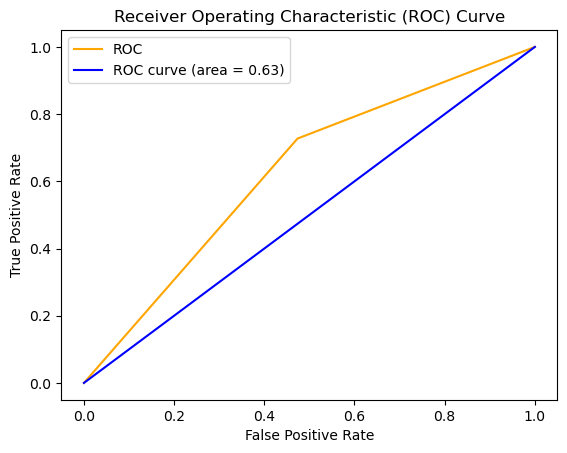

In [30]:
# ROC
TPR, FPR, Treshold = roc_curve(y_test, pred_data)
plt.plot(TPR, FPR, label= "ROC", color= 'orange')
plt.plot([0,1], [0,1], color= 'blue', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# SVM--> SVC ML Model

In [31]:
X= space_mission.drop(['Mission', 'Spacecraft', 'launch vehicle','Outcome' ], axis = 1)
y= space_mission['Outcome']
#make train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)
# Standardise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
pred_data= svc.predict(X_test)

In [32]:
# Calculating the Precision, Recall, Accuracy score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve
accuracy = accuracy_score(y_test, pred_data)
recall = recall_score(y_test, pred_data)
precision = precision_score(y_test, pred_data)
print('Accuracy score is: ',accuracy_score(y_test, pred_data))
print('Recall Score is : ',recall_score(y_test, pred_data))
print('Precision score is : ',precision_score(y_test, pred_data))
CM= confusion_matrix(y_test, pred_data)
print("Confusion Matrix is : ", CM)
F1_score = 2 * (recall * precision)/(recall + precision)
print("F1_score is : ", F1_score)
auc= roc_auc_score(y_test, pred_data)
print("auc is : ", auc)

Accuracy score is:  0.6923076923076923
Recall Score is :  0.7575757575757576
Precision score is :  0.7575757575757576
Confusion Matrix is :  [[11  8]
 [ 8 25]]
F1_score is :  0.7575757575757576
auc is :  0.6682615629984051


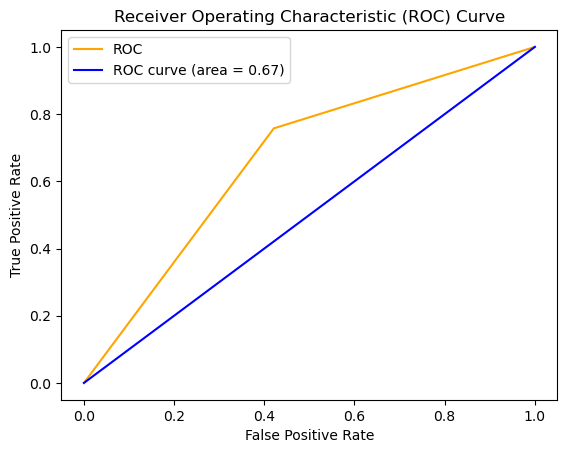

In [33]:
# ROC
TPR, FPR, Treshold = roc_curve(y_test, pred_data)
plt.plot(TPR, FPR, label= "ROC", color= 'orange')
plt.plot([0,1], [0,1], color= 'blue', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Decision Tree

In [34]:
#Importing and fiting the data in Decision Tree Classifier
from sklearn.tree  import DecisionTreeClassifier
regressor = DecisionTreeClassifier()
regressor.fit(X_train, y_train)
# Predicting the test data
pred_data = regressor.predict(X_test)

In [35]:
# Predicting the training data
Training_data_Prediction= regressor.predict(X_train)

In [36]:
# Calculating the Test data accuracy
Accuracy_test_data = accuracy_score(y_test, pred_data)
Accuracy_test_data

0.7115384615384616

In [37]:
# Calculating the Train data accuracy
Accuracy_training_data = accuracy_score(y_train, Training_data_Prediction)
Accuracy_training_data

0.9038461538461539

#### We can clearly see that there is huge difference between train data accuracy score and test data accuracy score, this is a clear sign of overfitting data.

## GridSearchCV

In [38]:
## Hyperparameter tuning

hyperparameter = {
    'criterion' : ["gini", "entropy", "log_loss"], 
    'splitter' : ["best", "random"], 
    'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features' : ["auto", "sqrt", "log2"]
}
regressor = DecisionTreeClassifier()

In [39]:
# Using GridSearchCV 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}
regressorCV = GridSearchCV(regressor, param_grid=hyperparameter, cv=5,scoring=scoring, refit="AUC", n_jobs=2, 
                           return_train_score=True)

In [40]:
regressorCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             refit='AUC', return_train_score=True,
             scoring={'AUC': 'roc_auc',
                      'Accuracy': make_scorer(accuracy_score)})

In [41]:
# Getting the best parameters from GridSearchCV
regressorCV.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [42]:
# Applying the best parameters inside the Decision Tree Classifier model. 
from sklearn.tree  import DecisionTreeClassifier
regressor = DecisionTreeClassifier(criterion = 'log_loss',
                                   max_depth = 4, max_features = 'log2', splitter = 'best')
regressor.fit(X_train, y_train)
pred_data = regressor.predict(X_test)

In [43]:
# Predicting the training data
Training_data_Prediction= regressor.predict(X_train)

In [44]:
# Calculating the Test data accuracy
Accuracy_test_data = accuracy_score(y_test, pred_data)
Accuracy_test_data

0.7115384615384616

In [45]:
# Calculating the Train data accuracy
Accuracy_training_data = accuracy_score(y_train, Training_data_Prediction)
Accuracy_training_data

0.8076923076923077

##### This model has imploved a lot, compared to the previous one. we can clearly see there is low bias and low variance. Hence we can consider these parameters of GridSearchCV

## RandomSearchCV

In [46]:
from sklearn.model_selection import RandomizedSearchCV
regressor = DecisionTreeClassifier()
hyperparameter = {
    'criterion' : ["gini", "entropy", "log_loss"], 
    'splitter' : ["best", "random"], 
    'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features' : ["auto", "sqrt", "log2"]
}

In [47]:
regressorCV = RandomizedSearchCV(regressor,hyperparameter, cv = 5)

In [48]:
regressorCV.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'splitter': ['best', 'random']})

In [49]:
regressorCV.best_params_

{'splitter': 'random',
 'max_features': 'sqrt',
 'max_depth': 6,
 'criterion': 'log_loss'}

In [50]:
from sklearn.tree  import DecisionTreeClassifier
regressor = DecisionTreeClassifier(splitter = 'random', max_features = 'sqrt', max_depth = 8, criterion = 'gini')
regressor.fit(X_train, y_train)
# Predicting the test data
pred_data = regressor.predict(X_test)

In [51]:
# Predicting the training data
Training_data_Prediction= regressor.predict(X_train)

In [52]:
# Calculating the Test data accuracy
Accuracy_test_data = accuracy_score(y_test, pred_data)
Accuracy_test_data

0.6923076923076923

In [53]:
# Calculating the Training data accuracy
Accuracy_training_data = accuracy_score(y_train, Training_data_Prediction)
Accuracy_training_data

0.8461538461538461

##### In RandomSearchCV we can clearly see there is low bias and high  variance. He we cannot consider these parameters of RandomSearchCV

#